# **Tugas Praktikum**

### **Tugas**

1. Buatlah sebuah model K-Means dengan ketentuan, Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

### **Jawaban**

1. Model K-Means

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


C:\Users\ALYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


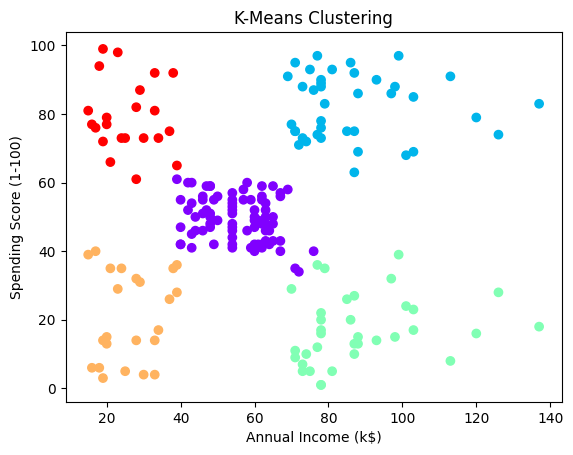

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Baca data dari file 'Mall_Customers.csv'
data = pd.read_csv('Mall_Customers.csv')

# Tampilkan beberapa baris pertama data
print(data.head())

# Pilih jumlah cluster (K) yang sesuai. Untuk contoh ini, mari pilih K=5.
kmeans = KMeans(n_clusters=5, random_state=0)

# Pilih fitur yang akan digunakan untuk clustering (misalnya, 'Annual Income' dan 'Spending Score')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Latih model K-Means
kmeans.fit(X)

# 5. Menggunakan model K-Means untuk mengelompokkan data
labels = kmeans.labels_
data['Cluster'] = labels

# 6. Memvisualisasikan hasil pengelompokan
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

2. Fitur Clustering minimal 2

A. KMeans Clustering

In [12]:
# Impor pustaka yang diperlukan
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np

# Contoh data (ganti ini dengan data nyata Anda)
data = np.array([[2, 3], [3, 4], [5, 5], [8, 7], [10, 9], [12, 10]])

# Contoh K-Means Clustering
kmeans = KMeans(n_clusters=2)  # Ganti 2 dengan jumlah cluster yang diinginkan
kmeans.fit(data)
labels = kmeans.labels_
print("Hasil K-Means Clustering:")
print(labels)

Hasil K-Means Clustering:
[1 1 1 0 0 0]


C:\Users\ALYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


B. Hierarchical Clustering

In [13]:
# Contoh Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')  # Ganti 2 dengan jumlah cluster yang diinginkan
agg_labels = agg_clustering.fit_predict(data)
print("Hasil Hierarchical Clustering:")
print(agg_labels)

Hasil Hierarchical Clustering:
[1 1 1 0 0 0]


3.  Model K-Means dengan pertimbangan jumlah  yang terbaik.

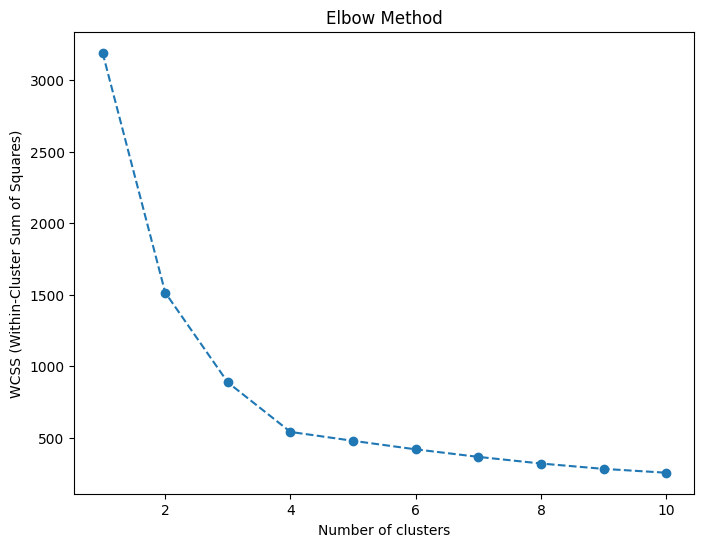

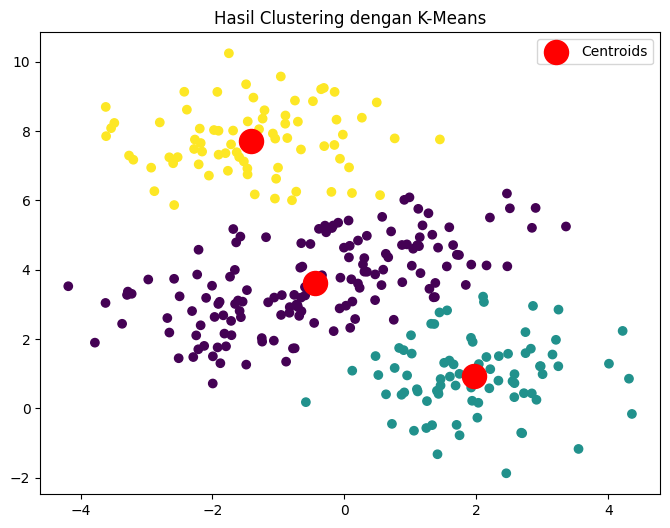

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Contoh data (gantilah dengan data Anda)
data, _ = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

# Langkah 2: Analisis Elbow untuk menentukan jumlah cluster yang optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Dari plot elbow method, Anda dapat memilih jumlah cluster yang optimal. 
# Misalnya, jika "siku" terletak di 3, maka jumlah cluster yang optimal adalah 3.

# Langkah 3: Buat dan latih model K-Means dengan jumlah cluster optimal
optimal_n_clusters = 3  # Gantilah dengan jumlah cluster optimal yang Anda tentukan
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

# Langkah 4: Visualisasikan hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Hasil Clustering dengan K-Means')
plt.legend()
plt.show()

4. Buatlah  implementasi model SOM untuk segmentasi citra lain

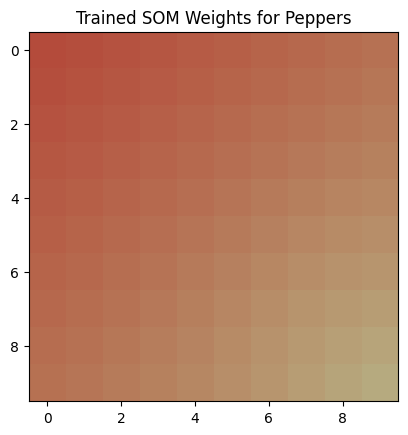

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)
    
    # Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
peppers_path = "peppers.tiff"
peppers = io.imread(peppers_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(peppers, num_epochs, initial_learning_rate, initial_neighborhood_radius)

# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Peppers')
plt.show()